In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import os
import seaborn as sns

In [2]:
data = pd.read_csv("../data/amharic_news_dataset.csv")
data

,headline,category,date,views,article,link
0,የኦሊምፒክ ማጣሪያ ተሳታፊዎች የሚለዩበት ቻምፒዮና እየተካሄደ ይገኛል,ስፖርት,"January 14, 2021",2,ብርሃን ፈይሳየኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻ...,https://www.press.et/Ama/?p=39481
1,አዲስ ዘመን ድሮ,መዝናኛ,"December 28, 2020",4,የአዲስ ዘመን ጋዜጣ ቀደምት ዘገባዎች በእጅጉ ተነባቢ ዛሬም ላገኛቸው በ...,https://www.press.et/Ama/?p=38334
2,የአረንጓዴ ጎርፍ በጎ አድራጎት አምባሳደሮች ተሰየሙ,ስፖርት,"January 6, 2021",6,ቦጋለ አበበየአዲስ አበባ ከተማ አስተዳደር ስፖርት ኮሚሽን ከኢትዮጵያ አረ...,https://www.press.et/Ama/?p=39010
3,የሊጉ በቢዝነስ ሞዴል መመራት አበረታች ጅምር መሆኑ ተገለጸ,ስፖርት,"January 6, 2021",5,ብርሃን ፈይሳአዲስ አበባ፡- የኢትዮጵያ ፕሪምየር ሊግ በሼር ካምፓኒ እንዲ...,https://www.press.et/Ama/?p=39011
4,የኦሊምፒክ ሥራ አስፈፃሚው እስከ ቶኪዮ ኦሊምፒክ ማግስት ይቀጥላል,ስፖርት,"January 6, 2021",12,ቦጋለ አበበ የኢትዮጵያ ኦሊምፒክ ኮሚቴ አርባ አምስተኛ መደበኛ ጠቅላላ ጉ...,https://www.press.et/Ama/?p=39012
...,...,...,...,...,...,...
51478,የ2011 በጀት ዓመት የውጭ ዲሎማሲያዊ ተግባራት ስኬታማ እንደነበሩ ተገለጸ,ፖለቲካ,"July 26, 2019",Unknown,በ2011 በጀት ዓመት የተከናወኑ የውጭ ዲፕሎማሲያዊ ተግባራት ስኬታማ እን...,https://waltainfo.com/am/31264/
51479,አቶ አገኘሁ ተሻገር የሰላም ግንባታና የሕዝብ ደህንነት ኃላፊ ሆነው ተሾሙ,ፖለቲካ,"July 25, 2019",Unknown,አቶ አገኘሁ ተሻገር የአማራ ክልል የሰላም ግንባታና የህዝብ ደህንነት ቢሮ...,https://waltainfo.com/am/31259/
51480,የአማራ ክልል ምክር ቤት የ230 ዳኞችን ሹመት አጸደቀ,ፖለቲካ,"July 25, 2019",Unknown,የአማራ ክልል ምክር ቤት የ230 ዳኞችን ሹመት አጸደቀየአማራ ክልል ምክር...,https://waltainfo.com/am/31260/
51481,ሃምሌ 22 ለሚካሄደው የችግኝ ተከላ መርሀ-ግብር 54 ሚሊየን ብር ተመድቧል,ሀገር አቀፍ ዜና,"July 25, 2019",Unknown,በዘንድሮ በጀት ዓመት ከ4 ቢሊዮን ችግኝ በላይ ለመትከል እቅድ መያዙ ይታ...,https://waltainfo.com/am/32585/


In [3]:
list(data.columns)

['headline', 'category', 'date', 'views', 'article', 'link']

In [4]:
data.isna().sum()

headline    13
category     1
date         0
views        0
article      0
link         0
dtype: int64

In [5]:
data['article'][0]

'ብርሃን ፈይሳየኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻምፒዮና በአዲስ አበባ ከተማ በመካሄድ ላይ ይገኛል። የተሻለ ብቃት ያሳዩ ቦክሰኞች ለቶኪዮ ኦሊምፒክ ማጣሪያ ተሳታፊ እንደሚሆኑም ታውቋል።በቦክስ ስፖርት ከሚካሄዱት ዓመታዊ ቻምፒዮናዎች መካከል አንዱ በክለቦች መካከል የሚካሄደው ነው፤ የዚህ ውድድር የመጀመሪያው ዙር በአዲስ አበባ ከተማ ተጀምሯል። የኢትዮጵያ ቦክስ ፌዴሬሽን ከአዲስ አበባ ቦክስ ፌዴሬሽን ጋር በመተባበር በተዘጋጀው በዚህ ቻምፒዮና፤ ከኮቪድ 19 ወረርሽኝ መከሰት በኋላ ለመጀመሪያ ጊዜ የተካሄደ ውድድርም ነው። በውድድሩም ላይ አምስት ክለቦች ከአዲስ አበባ (ፌዴራልፖሊስ፣ ፌዴራል ማረሚያ ቤቶች፣ አዲስ አበባ ፖሊስ፣ የኢትዮጵያ ወጣቶች ስፖርት አካዳሚ እና ኦሞቲክ ቦክስ)፣ ሁለት ክለቦች ከአማራ ክልል (ጎንደር ከነማ እና ደሴ ከነማ) እንዲሁም ድሬዳዋ ከነማ በድምሩ ስምንት ክለቦች ተሳታፊ መሆናቸውን የኢትዮጵያ ቦክስ ፌዴሬሽን መረጃ ያሳያል። በአጠቃላይ ክለቦቻቸውን ወክለውም 12 ሴትና 76 ወንድ ቦክሰኞች በጥቅሉ 88 ተወዳዳሪዎች ተሳታፊ ይሆናሉ። ውድድሩ የሚካሄደው በራስ ኃይሉ ስፖርት ትምህርትና ስልጠና ማዕከል ሲሆን፤ በ10 ክብደቶች በ49፣ 52፣ 57፣ 60፣ 63፣ 69፣ 70፣ 81፣ 89 እና 91 ኪሎ ግራሞች እየተካሄደም ይገኛል። የቦክስ ስፖርት ከንክኪ ስፖርቶች መካከል አንዱ እንደመሆኑ ጨዋታው በሚካሄድበት ወቅት ቦክሰኞቹ አካላዊ ቅርርብ ሊያደርጉ እና ሊነካኩ ይችላሉ። በመሆኑም በዚህ ረገድ ውድድሩ ሙሉ ለሙሉ የኮቪድ 19 ጥንቃቄን በተላበሰ መልኩ እየተካሄደ መሆኑን ነው ፌዴሬሽኑ ያረጋገጠው። ይኸውም ተወዳዳሪዎችና አሰልጣኞች የኮቪድ ምርመራ እንዲያደርጉና ከሌሎች ሰዎች ጋር እንዳይገናኙ በካምፕ እንዲቆዩ በማድረግ ነው። ከዚህ

In [6]:
data['headline'][0]

'የኦሊምፒክ ማጣሪያ ተሳታፊዎች የሚለዩበት ቻምፒዮና እየተካሄደ ይገኛል'

In [7]:
selected_data=pd.DataFrame()
selected_data['article_letter_length'] = data['article'].str.len()
selected_data['article_word_length'] = data['article'].str.split().str.len()
selected_data['headline_letter_length'] = data['headline'].str.len()
selected_data['headline_word_length'] = data['headline'].str.split().str.len()
selected_data['category'] = data['category']
selected_data

,article_letter_length,article_word_length,headline_letter_length,headline_word_length,category
0,1553,298,43.0,7.0,ስፖርት
1,2509,475,10.0,3.0,መዝናኛ
2,1449,265,32.0,6.0,ስፖርት
3,1582,296,37.0,8.0,ስፖርት
4,2648,476,41.0,8.0,ስፖርት
...,...,...,...,...,...
51478,1505,269,47.0,9.0,ፖለቲካ
51479,355,67,46.0,10.0,ፖለቲካ
51480,567,111,34.0,8.0,ፖለቲካ
51481,681,126,47.0,10.0,ሀገር አቀፍ ዜና


In [8]:
selected_data['category'].value_counts()

ሀገር አቀፍ ዜና    20674
ስፖርት          10411
ፖለቲካ           9325
ዓለም አቀፍ ዜና     6543
ቢዝነስ           3894
መዝናኛ            635
Name: category, dtype: int64

In [9]:
# x=pd.DataFrame()
selected_data['category'] = selected_data['category'].replace(['ሀገር አቀፍ ዜና', 'ስፖርት', 'ፖለቲካ', 'ዓለም አቀፍ ዜና','ቢዝነስ','መዝናኛ'], ['Nationwide News', 'Sport News', 'Politics News', 'Worldwide News','Business News','Entertainment News'])

<AxesSubplot:>

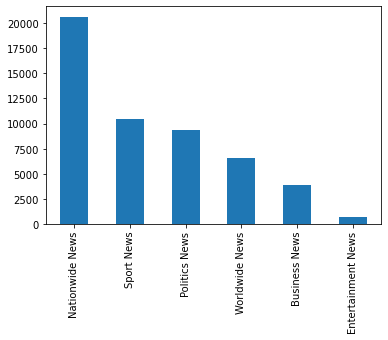

In [10]:

selected_data['category'].value_counts().plot(kind='bar')

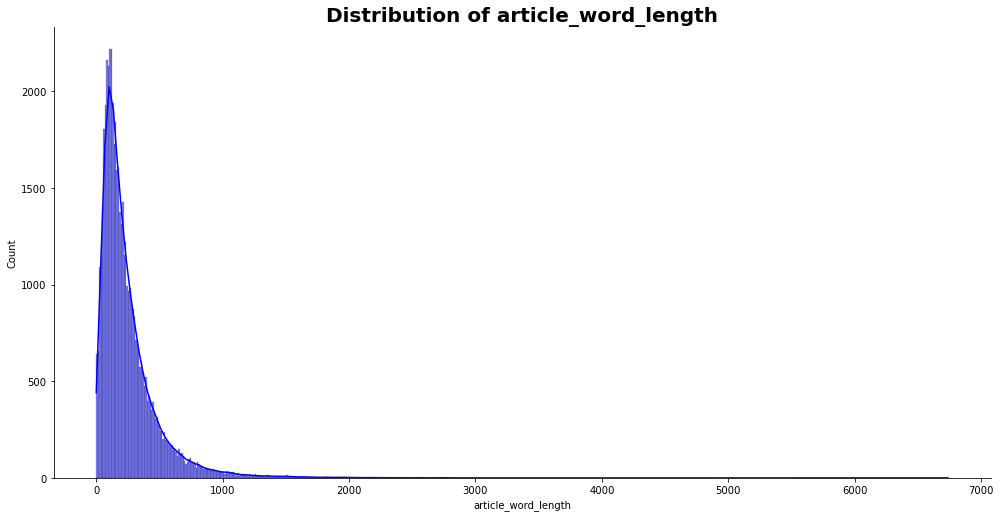

In [11]:
sns.displot(data=selected_data, x='article_word_length', color='blue',
                    kde=True, height=7, aspect=2)
plt.title('Distribution of article_word_length', size=20, fontweight='bold')
plt.show()

In [12]:
data['views'].value_counts()

Unknown    32943
27           162
30           156
36           148
32           147
           ...  
6720           1
8505           1
3768           1
2465           1
 2,959         1
Name: views, Length: 4408, dtype: int64

In [14]:
x=pd.DataFrame()
x['views'] = data['views'].replace(['Unknown'], ['0'])

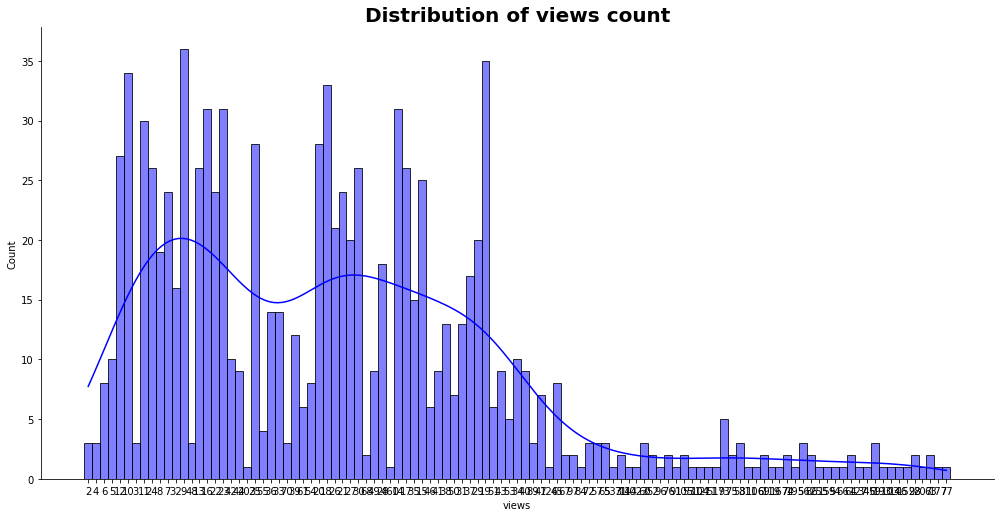

In [15]:
sns.displot(data=x.head(1000), x='views', color='blue',
                    kde=True, height=7, aspect=2)
plt.title('Distribution of views count', size=20, fontweight='bold')
plt.show()

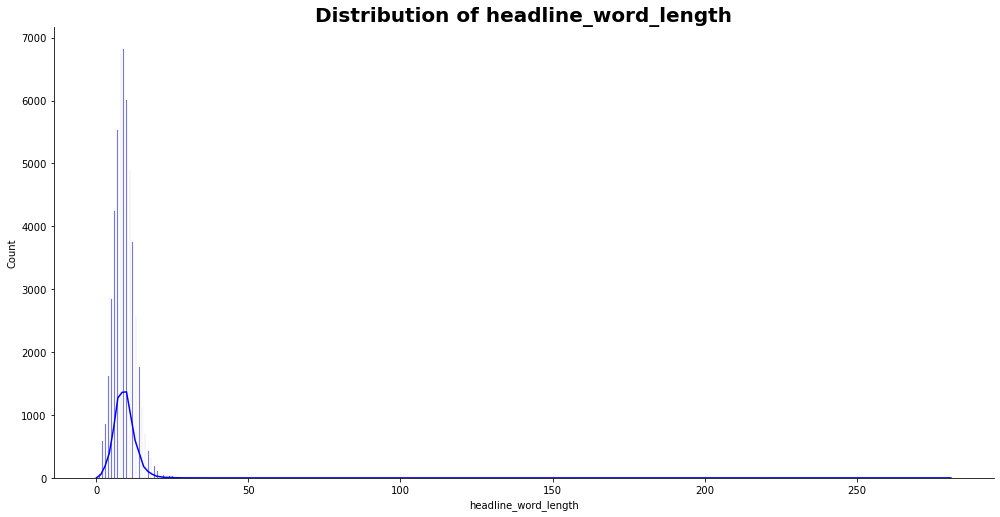

In [16]:
sns.displot(data=selected_data, x='headline_word_length', color='blue',
                    kde=True, height=7, aspect=2)
plt.title('Distribution of headline_word_length', size=20, fontweight='bold')
plt.show()

In [17]:
selected_data['headline'] = data['headline']
selected_data['article'] = data['article']

In [18]:
selected_data.save_csv("../data/selected_transcription_data")